In [16]:
import pandas as pd
from scipy.stats import linregress
from matplotlib import pyplot as plt
fp = "langs_by_county.csv"
csv_df = pd.read_csv(fp)
csv_df.sort_values('population')

,fips,county,state code,county code,population,no_french,pct_french,no_spanish,pct_spanish,no_chinese,pct_chinese
2,4017,"Navajo County, AZ",4,17,107322,85,0.079201,5885,5.483498,0,0.000000
100,35045,"San Juan County, NM",35,45,126503,205,0.162051,12025,9.505703,45,0.035572
49,15009,"Maui County, HI",15,9,160202,740,0.461917,2750,1.716583,210,0.131085
47,15001,"Hawaii County, HI",15,1,190821,625,0.327532,4440,2.326788,250,0.131013
25,6113,"Yolo County, CA",6,113,204593,605,0.295709,40085,19.592557,3385,1.654504
...,...,...,...,...,...,...,...,...,...,...,...
15,6073,"San Diego County, CA",6,73,3211252,9135,0.284468,725295,22.586051,27495,0.856208
1,4013,"Maricopa County, AZ",4,13,4009412,10680,0.266373,733630,18.297696,13750,0.342943
139,48201,"Harris County, TX",48,201,4336853,15510,0.357633,1313020,30.275871,28485,0.656813
50,17031,"Cook County, IL",17,31,5240700,18265,0.348522,991495,18.919133,39185,0.747705


In [64]:
#Floor division prevents millions of data points in calculating line
pop = csv_df['population']//10
spanish = csv_df['pct_spanish']
french = csv_df['pct_french']
chinese = csv_df['pct_chinese']
m,b, _,_,_ = linregress(pop,spanish)
min_pop = min(pop)
max_pop = max(pop)
line = [m*x+b for x in range(min_pop,max_pop)]

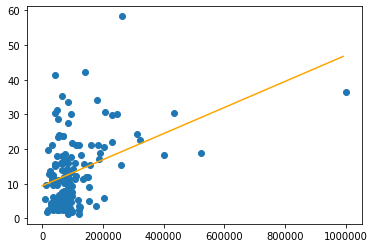

In [65]:
plt.scatter(pop,spanish)
plt.plot(line, color='orange')

In [13]:
min(pop)

107322

In [57]:
state_df = csv_df.groupby('state code').sum()
#Floor division prevents millions of data points in calculating line
state_pop = list(state_df['population']//100)
state_spanish = state_df['pct_spanish']
state_french = state_df['pct_french']
state_chinese = state_df['pct_chinese']
m,b,_,_,_ = linregress(state_pop,state_spanish)
min_pop = min(state_pop)
max_pop = max(state_pop)
#line = [m*x+b for x in range(min_pop,max_pop)]
line = [m*x+b for x in range(min_pop,max_pop)]

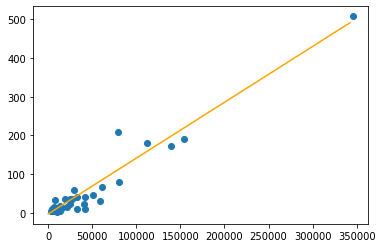

In [58]:
plt.scatter(state_pop,state_spanish)
plt.plot(line, color='orange')